In [103]:
import pandas as pd
import os as os
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering ##aggregate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import statistics as stats
import numpy as np
from sklearn.model_selection import train_test_split

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import plotly


# Hierarchical Clustering 
Hierachical involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, Divisive and Agglomerative. 

-Divisive clustering is a method of clustering wherein all instaces are considered as a cluster, further after multiple itearation single cluster is divided into multiple clusters.

-Agglomerative Clustering is a bottom-up approach, initially each instance is taken as a cluster and similarity between two clusters is found and those two clusters are joined. These two steps are repeated until only one cluster is formed.

In [334]:
#Please change the root directory while running this code
os.chdir("C:/PHD")
# %run Library_list.ipynb

In [19]:
newHotelData = pd.read_csv("NewHotels_CutstomerVisitsdata-1554810098964.csv")

In [20]:
existingHotelData = pd.read_csv("ExistingHotels_CustomerVisitsdata-1554810038262.csv")

In [21]:
existingHotelId = existingHotelData['Hotelid']
existingHotelUser = existingHotelData['userid']


In [24]:
df = existingHotelData.copy()

In [25]:
dfN = newHotelData.copy()

In [26]:
df.dtypes

Hotelid                         object
userid                          object
reviewtext                      object
Date                            object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AveragePricing                  object
dtype: object

In [27]:
cat_features = ['Value_rating', 'Rooms_rating', 'Location_rating', 'Cleanliness_rating', 'Checkin_rating', 'Service_rating', 'Businessservice_rating', 'AverageOverallRatingOfHotel']
num_features = ['NoOfReaders', 'HelpfulToNoOfreaders', 'AveragePricing']

In [28]:
df[cat_features] = df[cat_features].astype('category')

In [29]:
np.unique(df['Hotelid'])

array(['hotel_101', 'hotel_102', 'hotel_103', 'hotel_106', 'hotel_107',
       'hotel_108', 'hotel_109', 'hotel_110', 'hotel_111', 'hotel_112',
       'hotel_113', 'hotel_116', 'hotel_117', 'hotel_118', 'hotel_121',
       'hotel_122', 'hotel_123', 'hotel_124', 'hotel_127', 'hotel_128',
       'hotel_129', 'hotel_132', 'hotel_135', 'hotel_137', 'hotel_138',
       'hotel_139', 'hotel_140', 'hotel_141', 'hotel_142', 'hotel_144',
       'hotel_146', 'hotel_147', 'hotel_148', 'hotel_149', 'hotel_151',
       'hotel_152', 'hotel_153', 'hotel_154', 'hotel_155', 'hotel_156',
       'hotel_157', 'hotel_158', 'hotel_159', 'hotel_160', 'hotel_161',
       'hotel_162', 'hotel_164', 'hotel_165', 'hotel_166', 'hotel_167',
       'hotel_168', 'hotel_169', 'hotel_170', 'hotel_171', 'hotel_174',
       'hotel_175', 'hotel_176', 'hotel_177', 'hotel_178', 'hotel_179',
       'hotel_180', 'hotel_181', 'hotel_182', 'hotel_183', 'hotel_184',
       'hotel_185', 'hotel_186', 'hotel_188', 'hotel_190', 'hote

In [30]:
df.head(2)  

,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,13-Dec-08,0,0,4,4,1,4,4,4,3,3.5,$245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,2-Dec-08,0,0,2,4,3,3,1,2,2,3.5,$245


In [31]:
df['AveragePricing'] = df['AveragePricing'].str.slice(1,4)
dfN['AveragePricing'] = dfN['AveragePricing'].str.slice(1,4)

In [45]:
data = df[['Value_rating', 'Rooms_rating', 'Location_rating', 'Cleanliness_rating', 'Checkin_rating', 'Service_rating', 'Businessservice_rating', 'AverageOverallRatingOfHotel','AveragePricing' ]]

In [46]:
data.head()

,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,4,4,1,4,4,4,3,3.5,245
1,2,4,3,3,1,2,2,3.5,245
2,2,4,3,4,2,3,1,3.5,245
3,5,5,6,6,5,5,3,3.5,245
4,5,6,6,6,6,1,6,3.5,245


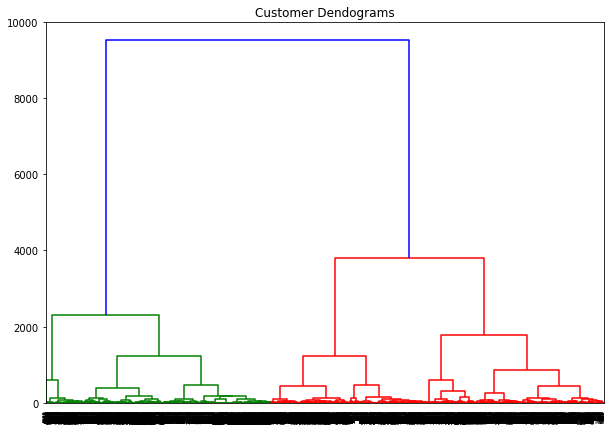

In [47]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

Number of Clusters is determined by drawing a horizontal line passing through the second division of the dendogram

In [189]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [200]:
#Training and predicting existing hotel data

pred_existingHotel_data = cluster.fit_predict(data[['AverageOverallRatingOfHotel', 'AveragePricing']])

In [201]:
# Training and predicting new hotel data

pred_newHotel_Data = cluster.fit_predict(dfN[['AverageOverallRatingOfHotel', 'AveragePricing']])
pred_newHotel_Data

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [193]:
## Merging the Predicted values with the original Dataframe
label = "cluster_value"
clusterValue = pd.DataFrame(pred_newHotel_Data, columns = [label])
mergedData = pd.concat([dfN, clusterValue], axis = 1)

In [194]:
mergedData.head(2)

,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing,cluster_value
0,hotel_104,hotel_4342,Awesome Everything about this resort was great...,"Jan 5, 2009",0,0,6,6,6,6,6,6,6,4.0,227,0
1,hotel_104,hotel_2024,Convenient When I say Above Average I'm compa...,"Nov 10, 2008",0,0,4,4,6,5,4,5,1,4.0,227,0


In [195]:
pd.unique(mergedData['cluster_value'])

array([0, 1, 2], dtype=int64)

In [80]:
mergedData.to_csv("newHotelData.csv")

In [196]:
data['AveragePricing'].count()

7504

# Plots

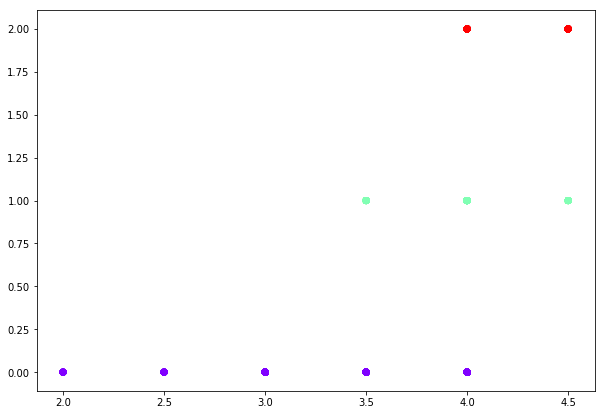

In [197]:
plt.figure(figsize=(10, 7))  
plt.scatter(mergedData['AverageOverallRatingOfHotel'],mergedData['cluster_value'], c=cluster.labels_, cmap='rainbow')  

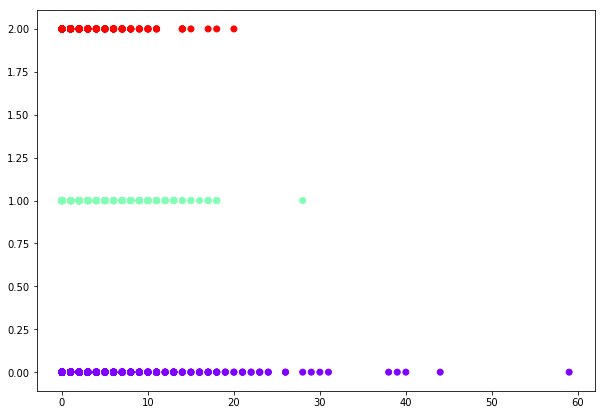

In [199]:
plt.figure(figsize=(10, 7))  
plt.scatter(mergedData['HelpfulToNoOfreaders'],mergedData['cluster_value'], c=cluster.labels_, cmap='rainbow')

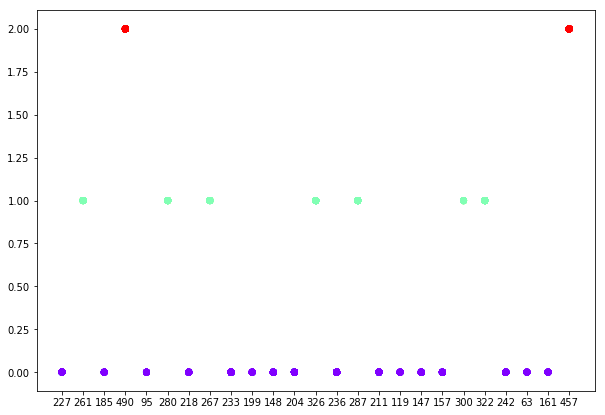

In [204]:
plt.figure(figsize=(10, 7))  
plt.scatter(mergedData['AveragePricing'],mergedData['cluster_value'], c=cluster.labels_, cmap='rainbow')

# KMeans Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents. 

In [259]:
existingHotelData['AveragePricing'] = existingHotelData['AveragePricing'].str.slice(1,4)

data2 = existingHotelData[['Value_rating', 'Rooms_rating', 'Location_rating', 'Cleanliness_rating', 'Checkin_rating', 'Service_rating', 'Businessservice_rating', 'AverageOverallRatingOfHotel',
          'NoOfReaders','HelpfulToNoOfreaders', 'AveragePricing']]

numeric_vars = data2.drop(['AverageOverallRatingOfHotel'],axis=1)

X_train, X_test= train_test_split(numeric_vars, test_size=0.150) 

In [260]:
#Starndardising Train Data

std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, object were all converted to float64 by StandardScaler.

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64, object were all converted to float64 by StandardScaler.

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning:

Data with input dtype int64, object were all converted to float64 by StandardScaler.



In [261]:
X_train_std[0:5,:]

array([[-0.00768445,  0.54035048,  0.54914181,  0.40609516,  1.12818901,
         1.03879649,  0.74882979, -0.0826812 ,  0.09005777,  0.97232737],
       [-0.55225615,  0.54035048, -1.30620263, -0.13429185, -1.24722018,
        -0.01327878, -0.8067135 ,  0.61950344,  0.66158855,  0.51232092],
       [ 0.53688724,  0.54035048,  1.01297792,  0.40609516,  1.12818901,
        -0.01327878,  1.78585865, -0.55080429, -0.48147302,  1.08452406],
       [-1.64139955,  0.54035048, -1.30620263,  0.40609516, -1.24722018,
        -0.01327878, -0.8067135 ,  0.15138035,  0.37582316,  1.73526488],
       [ 0.53688724,  0.54035048,  1.01297792, -0.13429185,  0.65310718,
         0.51275886, -0.8067135 , -0.55080429, -0.48147302, -0.77794105]])

In [262]:
X_train.index

Int64Index([6564, 5666, 7376, 5914, 1275, 4708, 5036, 2475, 4876, 7076,
            ...
            3945, 1381, 4391,  159, 2364,  689, 7194, 5097, 5905, 2857],
           dtype='int64', length=6378)

In [263]:
# Number of clusters
kmeans = KMeans(n_clusters=2,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(X_train_std)
# Getting the cluster labels
labels = kmeans.predict(X_train_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [264]:
centroids

array([[-1.2704379 , -1.30380111, -1.00692091, -1.3325669 , -1.04165343,
        -1.22502869, -0.69227298,  0.3036798 ,  0.22538754, -0.10878408],
       [ 0.51315288,  0.52662889,  0.4067136 ,  0.53824791,  0.42074269,
         0.49481128,  0.2796216 , -0.12266177, -0.09103811,  0.04393986]])

In [267]:
#Capturing necessary features from new Hotel data and Predicting using KMeans
newHotelData['AveragePricing'] = newHotelData['AveragePricing'].str.slice(1,4)

newHotelDataDf = newHotelData[['Value_rating', 'Rooms_rating', 'Location_rating', 'Cleanliness_rating', 'Checkin_rating', 'Service_rating', 'Businessservice_rating',
          'NoOfReaders','HelpfulToNoOfreaders', 'AveragePricing']]

In [268]:
#Starndardising Train Data

std = StandardScaler()
std.fit(newHotelDataDf)
X_newHotel_std= std.transform(newHotelDataDf)

# X_test_std= std.transform(X_test)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, object were all converted to float64 by StandardScaler.

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64, object were all converted to float64 by StandardScaler.



In [269]:
#Predicting the new hotel data

pred_new_hotel = kmeans.predict(X_newHotel_std)
centroids_newHotel = kmeans.cluster_centers_
centroids_newHotel

array([[-1.2704379 , -1.30380111, -1.00692091, -1.3325669 , -1.04165343,
        -1.22502869, -0.69227298,  0.3036798 ,  0.22538754, -0.10878408],
       [ 0.51315288,  0.52662889,  0.4067136 ,  0.53824791,  0.42074269,
         0.49481128,  0.2796216 , -0.12266177, -0.09103811,  0.04393986]])

In [270]:
X_newHotel_std[0:5,:]

array([[ 1.0681997 ,  1.0701255 ,  1.08352671,  0.91193497,  1.15537223,
         0.9956898 ,  1.87323202, -0.63836777, -0.68241958, -0.35909561],
       [-0.01291736, -0.02370181,  1.08352671,  0.38115528,  0.20765993,
         0.47693941, -0.75342056, -0.63836777, -0.68241958, -0.35909561],
       [-0.55347589, -0.02370181,  0.14698638,  0.38115528,  1.15537223,
        -0.04181099,  0.82257099, -0.63836777, -0.68241958, -0.35909561],
       [ 1.0681997 ,  1.0701255 ,  1.08352671,  0.91193497,  1.15537223,
         0.9956898 ,  1.87323202, -0.63836777, -0.68241958, -0.35909561],
       [ 1.0681997 , -0.02370181,  1.08352671,  0.91193497,  1.15537223,
         0.9956898 ,  1.87323202, -0.13880199, -0.22357047, -0.35909561]])

In [271]:
# Merging the clusters formed into a single dataframe with existing new hotel dataframe

label = "cluster_value"
clusterValue = pd.DataFrame(pred_new_hotel, columns = [label])
mergedData2 = pd.concat([dfN, clusterValue], axis = 1)

In [272]:
pred_new_hotel

array([1, 1, 1, ..., 0, 1, 0])

In [273]:
# Getting the cluster labels for the test Data set
labels_test = kmeans.predict(X_test_std)
labels_test

array([0, 0, 1, ..., 0, 1, 1])

In [274]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[-1.2704379  -1.30380111 -1.00692091 -1.3325669  -1.04165343 -1.22502869
  -0.69227298  0.3036798   0.22538754 -0.10878408]
 [ 0.51315288  0.52662889  0.4067136   0.53824791  0.42074269  0.49481128
   0.2796216  -0.12266177 -0.09103811  0.04393986]]
39761.234892387576


In [275]:
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

In [276]:
wss

{1: 63780.0,
 2: 39761.234892387576,
 3: 30235.99735495217,
 4: 26656.658304860543,
 5: 23785.236485614267,
 6: 21084.701519561047,
 7: 19509.124325953813,
 8: 18293.55545922698,
 9: 17411.676015165205}

In [314]:
#iterating through the newhoteldata to fing the cluster labels

wss_newHotel= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_newHotel_std)
    newhotel_clusters = kmeans.labels_
    wss_newHotel[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

In [297]:
wss_newHotel

{1: 24690.0,
 2: 15517.22093170179,
 3: 11831.426838736897,
 4: 10333.795013043975,
 5: 9081.346416313916,
 6: 7956.61045328144,
 7: 7275.2417306228035,
 8: 6862.091195449642,
 9: 6474.677053852891}

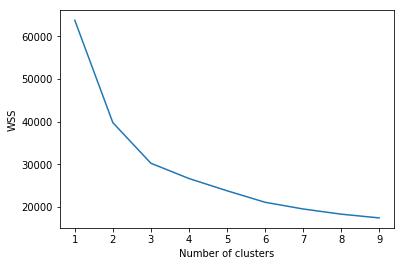

In [315]:
#Plotting elbow curve to detrmine number of clusters for training data
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

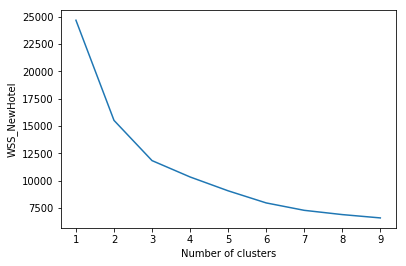

In [320]:
#Plotting elbow curve to detrmine number of clusters for newHotelData

plt.figure()
plt.plot(list(wss_newHotel.keys()), list(wss_newHotel.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS_NewHotel")
plt.show()

In [321]:
X_train_std=pd.DataFrame(X_train_std)

In [322]:
indices=X_train_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([ 593,  193, 3533, 2488, 1152,   28, 6319, 2353, 4385,  330,
            ...
            2550, 5695, 4939, 3100, 1643, 1444, 5070, 1907, 1347, 3668],
           dtype='int64', length=5740)


In [323]:
X_newHotel_std = pd.DataFrame(X_newHotel_std)

In [324]:
indices_newHotel=X_newHotel_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([ 593,  193, 3533, 2488, 1152,   28, 6319, 2353, 4385,  330,
            ...
            2550, 5695, 4939, 3100, 1643, 1444, 5070, 1907, 1347, 3668],
           dtype='int64', length=5740)


In [325]:
Alpha=X_train_std.iloc[indices,:]
Alpha.head(2)

,0,1,2,3,4,5,6,7,8,9,clus
593,-1.096828,-1.129395,0.549142,-1.215066,0.653107,-1.065354,-0.288199,-0.550804,-0.481473,-0.306715,0
193,0.536887,1.096932,1.012978,0.946482,1.128189,1.038796,1.785859,-0.550804,-0.767238,1.084524,1


In [326]:
Alpha_newHotel = X_newHotel_std.iloc[indices_newHotel,:]
Alpha_newHotel.head(2)

,0,1,2,3,4,5,6,7,8,9
1641,-1.634593,-1.664443,-1.257824,-1.741963,-1.213909,-1.598062,-0.753421,0.027720,0.235279,-0.533200
2266,-1.634593,-1.664443,-1.257824,-1.741963,-1.213909,-1.598062,-0.753421,-0.138802,-0.452995,-0.195872


In [327]:
kmeans = KMeans(n_clusters=2)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_

6378


In [328]:
kmeans = KMeans(n_clusters=2)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

5740


C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [329]:
kmeans_newHotel = KMeans(n_clusters=4)
kmeans1_newHotel = kmeans.fit(X_train_std)
print(len(kmeans1_newHotel.labels_))
# X_newHotel_std['clus']=kmeans1_newHotel.labels_

6378


In [330]:
# kmeans = KMeans(n_clusters=2)
kmeans2_newHotel=kmeans_newHotel.fit(Alpha_newHotel)
print(len(kmeans2_newHotel.labels_))

2222


In [331]:
newhotel_clusters

array([6, 7, 1, ..., 5, 4, 5])

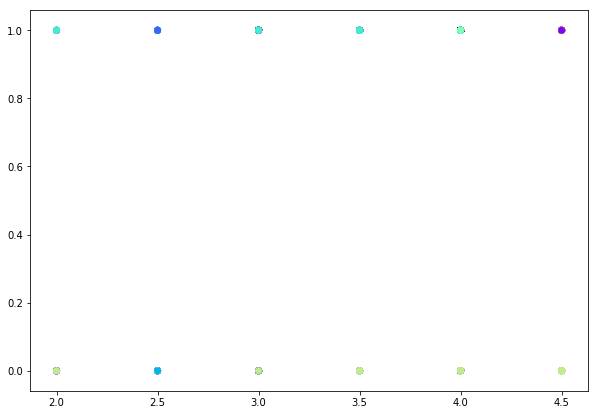

In [332]:
# g1=X_train_std.loc[indices,'clus']
# g2=Alpha.clus
plt.figure(figsize=(10, 7))  
plt.scatter(mergedData2['AverageOverallRatingOfHotel'],mergedData2['cluster_value'], c=newhotel_clusters, cmap='rainbow')  

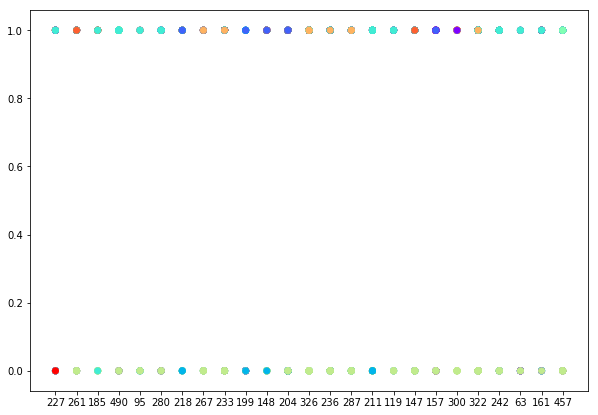

In [333]:
plt.figure(figsize=(10, 7))  
plt.scatter(mergedData2['AveragePricing'],mergedData2['cluster_value'], c=newhotel_clusters, cmap='rainbow')  